# Image Segmentation with SAM (Segment Anything Model)

In this exercise, we delve into the world of image segmentation using the advanced SAM (Segment Anything Model). We will explore how to employ this model for segmenting specific parts of an image, a crucial step in various computer vision tasks. By the end, we'll segment an image of a butterfly by providing SAM with a bounding box. We'll see it segment the butterfly with extreme precision.

## Setup

First, let's import the necessary libraries. We use OpenCV for image processing, NumPy for numerical operations, and Matplotlib for visualization.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/student/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/home/student/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/home/student/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting

## Helper Functions

To effectively visualize our segmentation results, we define some helper functions. These functions will assist us in overlaying segmentation masks and drawing bounding boxes on our images.

In [2]:
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6]) # An opaque blue color we'll use to indicate the mask
    
    # TODO: Implement the function to overlay a color mask on the image. 
    # Hint: Using the color array, reshape the mask, and multiply with the color for overlay.
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_box(box, ax):
    # TODO: Complete this function to draw a bounding box on the image.
    # Hint: Use plt.Rectangle to draw the box.
    
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

## Loading and Preparing the Model

We will now load a pre-trained SAM model. SAM models are potent for various segmentation tasks and come with pre-trained weights.

In [3]:
# Load the SAM model with pre-trained weights
sam_checkpoint = "/home/student/sam-hq/pretrained_checkpoint/sam_hq_vit_l.pth"
model_type = "vit_l"
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

<All keys matched successfully>


## Image Preparation

Next, we load an image for our segmentation task. We convert the image to the RGB color space, as the SAM model expects input in this format.

In [4]:
# Load and preprocess an image for segmentation
image = cv2.imread('/home/student/sam-hq/demo/input_imgs/example1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Conducting and Visualizing Segmentation

Let's perform the actual segmentation on our image. We'll define the input parameters for our segmentation task and apply the SAM model.

In [5]:
# Define parameters for segmentation
input_box = np.array([[306, 132, 925, 893]]) # Do not change

# Segmentation using SAM
predictor.set_image(image)

# TODO: Use the predictor to perform segmentation. Pay attention to the parameters and how they might affect the segmentation output.
# Hint: You need to call predictor.predict() 
# Hint: Choose from below arguments:
"""
      point_coords (np.ndarray or None): A Nx2 array of point prompts to the
        model. Each point is in (X,Y) in pixels.
      point_labels (np.ndarray or None): A length N array of labels for the
        point prompts. 1 indicates a foreground point and 0 indicates a
        background point.
      box (np.ndarray or None): A length 4 array given a box prompt to the
        model, in XYXY format.
      mask_input (np.ndarray): A low resolution mask input to the model, typically
        coming from a previous prediction iteration. Has form 1xHxW, where
        for SAM, H=W=256.
"""
# Hint: Use the argument "hq_token_only = True" for higher accuracy

masks, scores, logits = predictor.predict(
    box = input_box,
    hq_token_only= True
)

Next, let's write the segmentation visualization logic.

In [6]:
def show_res(masks, scores, input_box, image):
    # TODO: Iterate over the masks and scores, use the visualization functions to display the results.
    # Hint: First display the image, then display mask and box on top
    # Hint: Use plt.imshow(image)
    # Hint: Use show_box and show_mask
    
    # TODO: Print the final score

    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        
        box = input_box[i]
        
        show_mask(mask, plt.gca())
        show_box(box, plt.gca())
        
        print(f"Score: {score:.3f}")
        
        plt.axis('off')
        plt.show()

Score: 0.985


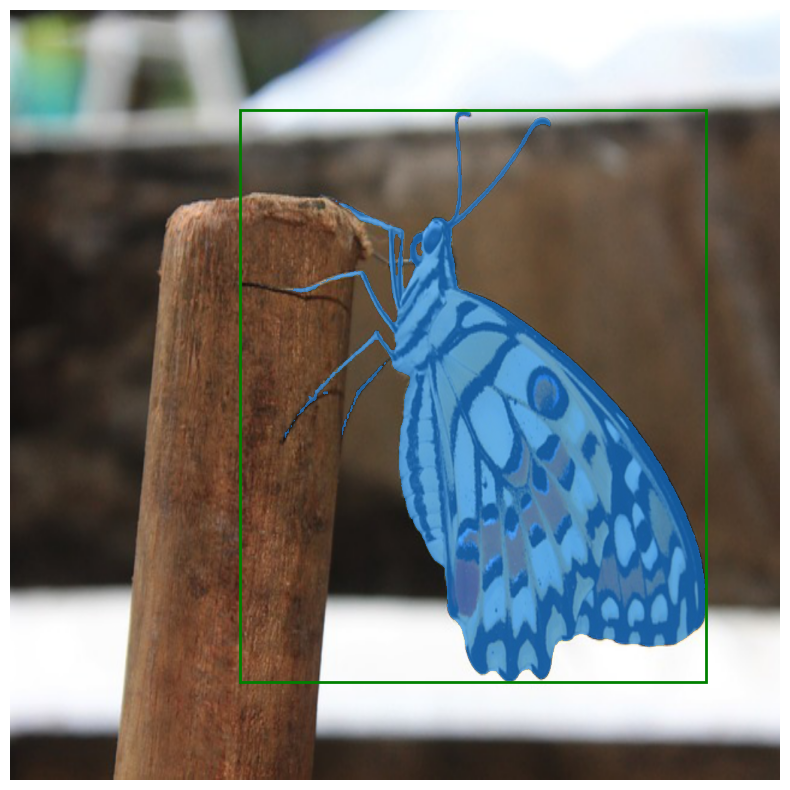

In [7]:
# Visualize the segmentation results
show_res(masks, scores, input_box, image)

In [15]:
print(image.shape)

(1024, 1024, 3)


Score: 0.996


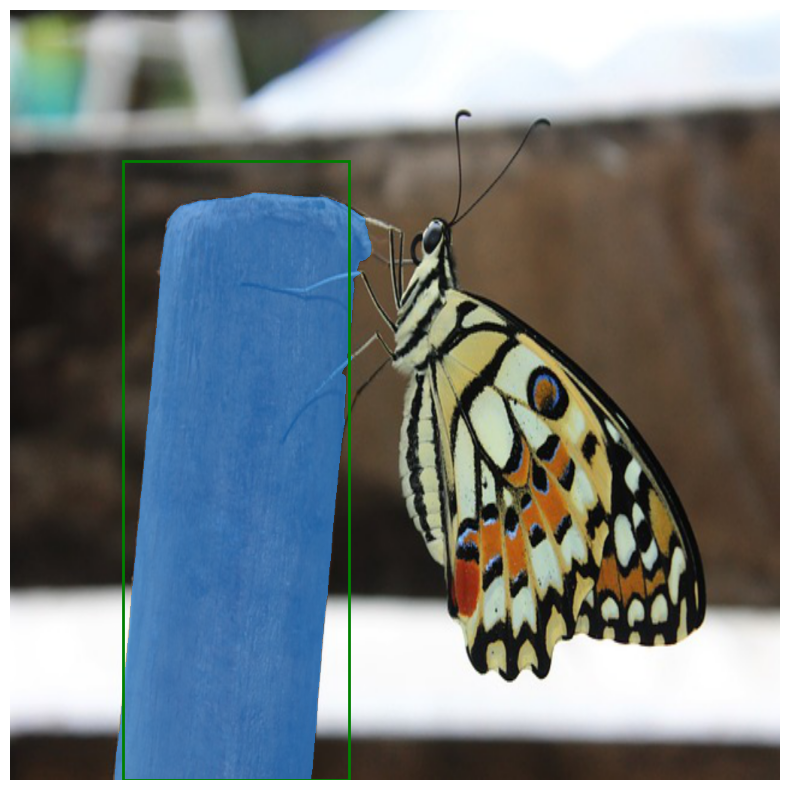

In [27]:
# segment the wooden stick
input_box = np.array([[150, 200, 450, 1024]])

# Segmentation using SAM
predictor.set_image(image)

masks, scores, logits = predictor.predict(
    box = input_box,
    hq_token_only= True
)

# Visualize the segmentation results
show_res(masks, scores, input_box, image)